## EDA for data understanding and visualisations

In [1]:
# Importing the relevant libraries

import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow
from modeling.config import TRACKING_URI, EXPERIMENT_NAME

pd.set_option('display.max_columns', None)

RSEED = 42
# Modeling Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # pip install plotly needs to executed
import plotly.graph_objects as go

In [2]:
# We need to add plotly to our requirements

In [3]:
# Reading in the data 
df = pd.read_csv('../data/Flu_Shot_Data_cleaned_2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

In [5]:
# Looking at the distribution of our target variables 

print(df.h1n1_vaccine.value_counts(normalize=True))
print(df.seasonal_vaccine.value_counts(normalize=True))

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64
0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

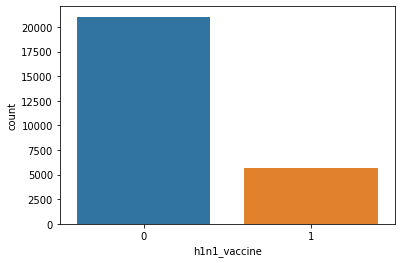

In [6]:
sns.countplot(x='h1n1_vaccine', data=df)

/Users/julianeberek/neuefische/TheFluShot/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


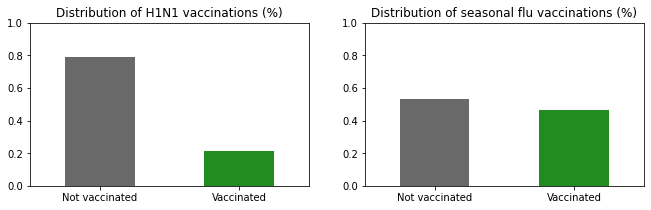

In [7]:
# Creating plots for the distribution of our target variables 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,3))

df['h1n1_vaccine'].value_counts(normalize=True).plot(kind='bar', ax=ax1, color=['dimgrey', 'forestgreen'], rot=0)
ax1.set_title('Distribution of H1N1 vaccinations (%)')
ax1.set_xlabel('')
ax1.set_xticklabels(['Not vaccinated', 'Vaccinated'])
ax1.set_ylim([0,1]) # setting the limits for the y-axis

df['seasonal_vaccine'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color=['dimgrey', 'forestgreen'], rot=0)
ax2.set_title('Distribution of seasonal flu vaccinations (%)')
ax2.set_xlabel('')
ax2.set_xticklabels(['Not vaccinated', 'Vaccinated'])
ax2.set_ylim([0,1]) # setting the limits for the y-axis

fig.subplots_adjust(hspace=0.3)
plt.savefig('../images/distribution_target.jpg')
plt.show()


In [8]:
df.groupby('h1n1_vaccine')['seasonal_vaccine'].value_counts(sort=False)

h1n1_vaccine  seasonal_vaccine
0             0                   13295
              1                    7738
1             0                     977
              1                    4697
Name: seasonal_vaccine, dtype: int64

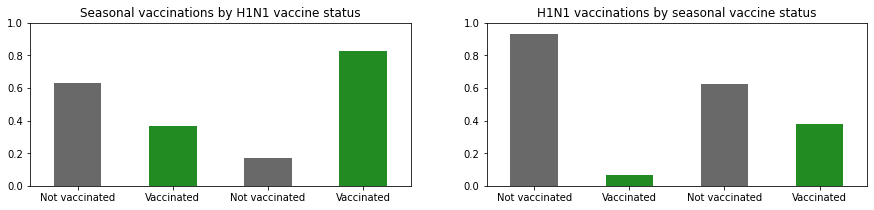

In [9]:
# Creating plots for the distribution of overlaps between H1N1 and seasonal flu vaccines

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))

df.groupby('h1n1_vaccine').seasonal_vaccine.value_counts(normalize=True, sort=False).plot(kind='bar', color=['dimgrey', 'forestgreen'], ax=ax1,  rot=0)
ax1.set_title('Seasonal vaccinations by H1N1 vaccine status')
ax1.set_xlabel('')
ax1.set_xticklabels(['Not vaccinated', 'Vaccinated', 'Not vaccinated', 'Vaccinated'])
ax1.set_ylim([0,1])

df.groupby('seasonal_vaccine').h1n1_vaccine.value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax2, color=['dimgrey', 'forestgreen'], rot=0)
ax2.set_title('H1N1 vaccinations by seasonal vaccine status')
ax2.set_xlabel('')
ax2.set_xticklabels(['Not vaccinated', 'Vaccinated', 'Not vaccinated', 'Vaccinated'])
ax2.set_ylim([0,1])

fig.subplots_adjust(hspace=0.3)
plt.savefig('../images/distribution_target_compared.jpg')
plt.show()


- The share of people with seasonal flu vaccination is higher among people that did get an H1N1 vaccine.
- The share of people with H1N1 vaccination is higher among people that also go the seasonal flu vaccine.
- The graphs show that there seems to be a correlation between both types of vaccinations. 

- The graphs are not self explanatory. There needs to be a better indication. 

## Influence of doctor's recommendations 

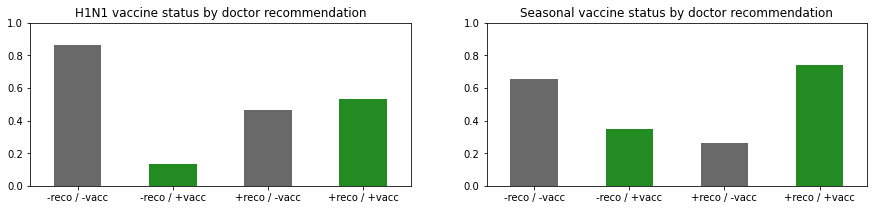

In [10]:
# Creating plots for showing if vaccinations have been recommended by a doctor

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))

df.groupby('doctor_recc_h1n1').h1n1_vaccine.value_counts(normalize=True, sort=False).plot(kind='bar', color=['dimgrey', 'forestgreen'], ax=ax1,  rot=0)
ax1.set_title('H1N1 vaccine status by doctor recommendation')
ax1.set_xlabel('')
ax1.set_xticklabels(['-reco / -vacc', '-reco / +vacc', '+reco / -vacc', '+reco / +vacc'])
ax1.set_ylim([0,1])

df.groupby('doctor_recc_seasonal').seasonal_vaccine.value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax2, color=['dimgrey', 'forestgreen'], rot=0)
ax2.set_title('Seasonal vaccine status by doctor recommendation')
ax2.set_xlabel('')
ax2.set_xticklabels(['-reco / -vacc', '-reco / +vacc', '+reco / -vacc', '+reco / +vacc'])
ax2.set_ylim([0,1])
# ax2.legend(title='color', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.subplots_adjust(hspace=0.3)

plt.savefig('../images/target_recommendations.jpg')
plt.show()


- Recommendations of the respective vaccine are important for getting the vaccine.
- Only a small proportion of people that did not get a recommendation, got the vaccine. 
- For seasonal flu vaccinations, the share of people that did not get a recommendation from a doctor is higher than for H1N1.

- In order to get some of the columns into Categorical mode, they will be changed.
- Otherwise, plots will adapt different strategies for displaying the order of them (sort=False does not work)

In [11]:
df['opinion_h1n1_risk'] = pd.Categorical(df['opinion_h1n1_risk'], ordered=True)
df['opinion_seas_risk'] = pd.Categorical(df['opinion_seas_risk'], ordered=True)

df['h1n1_concern'] = pd.Categorical(df['h1n1_concern'], ordered=True)
df['h1n1_knowledge'] = pd.Categorical(df['h1n1_knowledge'], ordered=True)

### Investigating Vaccinations by risk awareness

/Users/julianeberek/neuefische/TheFluShot/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


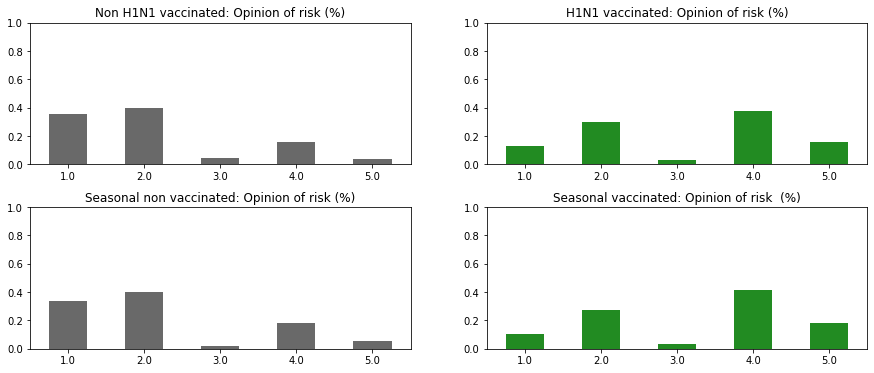

In [12]:
# Splitting the dataset into vaccinated and non vaccinated for each vaccine type
plot_h1n1_no = df.loc[df['h1n1_vaccine']== 0]
plot_h1n1_yes = df.loc[df['h1n1_vaccine']== 1]
plot_seasonal_no = df.loc[df['seasonal_vaccine']== 0]
plot_seasonal_yes = df.loc[df['seasonal_vaccine']== 1]

fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, figsize=(15,6))

plot_h1n1_no['opinion_h1n1_risk'].value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax1, rot=0, color='dimgrey')
ax1.set_title('Non H1N1 vaccinated: Opinion of risk (%)')
ax1.set_xlabel('')
ax1.set_ylim([0,1]) # setting the limits for the y-axis

plot_h1n1_yes['opinion_h1n1_risk'].value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax2, rot=0, color='forestgreen')
ax2.set_title('H1N1 vaccinated: Opinion of risk (%)')
ax2.set_xlabel('')
ax2.set_ylim([0,1]) # setting the limits for the y-axis

plot_seasonal_no['opinion_seas_risk'].value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax3, rot=0, color='dimgrey')
ax3.set_title('Seasonal non vaccinated: Opinion of risk (%)')
ax3.set_xlabel('')
ax3.set_ylim([0,1]) # setting the limits for the y-axis

plot_seasonal_yes['opinion_seas_risk'].value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax4, rot=0, color='forestgreen')
ax4.set_title('Seasonal vaccinated: Opinion of risk  (%)')
ax4.set_xlabel('')
ax4.set_ylim([0,1]) # setting the limits for the y-axis

fig.subplots_adjust(hspace=0.3)
plt.show()

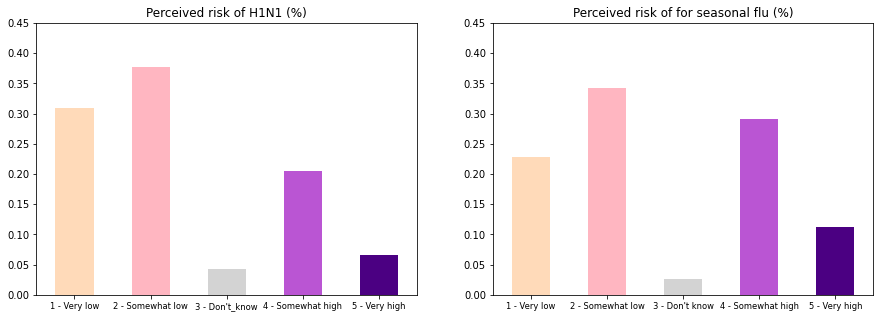

In [13]:
# Plotting the overall risk perception for H1N1 and for seasonal flu

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15,5))

df['opinion_h1n1_risk'].value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax1, rot=0, color=['peachpuff', 'lightpink', 'lightgray', 'mediumorchid', 'indigo']
)
ax1.set_title('Perceived risk of H1N1 (%)')
ax1.set_xlabel('')
ax1.set_xticklabels(["1 - Very low", "2 - Somewhat low", "3 - Don't_know", "4 - Somewhat high",
                                 "5 - Very high"], fontsize='small')
ax1.set_ylim([0,0.45]) # setting the limits for the y-axis

df['opinion_seas_risk'].value_counts(normalize=True, sort=False).plot(kind='bar', ax=ax2, rot=0, color=['peachpuff', 'lightpink', 'lightgray', 'mediumorchid', 'indigo'])
ax2.set_title('Perceived risk of for seasonal flu (%)')
ax2.set_xlabel('')
ax2.set_xticklabels(["1 - Very low", "2 - Somewhat low", "3 - Don't know", "4 - Somewhat high",
                                  "5 - Very high"], fontsize='small')
ax2.set_ylim([0,0.45]) # setting the limits for the y-axis


fig.subplots_adjust(hspace=0.3)

plt.savefig('../images/risk_perception.jpg')
plt.show()


- Surprisingly, the risk for seasonal flu is estimated higher than the risk for H1N1. 
- Next step: investigate on the level of knowledge and the level of concern for H1N1.

In [14]:
# Plotting concerns about H1N1 
# note that an image can only be printed once the kaleido package is installed: pip install -U kaleido

x_concern = df.h1n1_concern.value_counts(normalize=True)
x_concern_labels = ['Not at all concerned', 'Not very concerned', 'Somewhat concerned', 'Very concerned']

fig = px.pie(df, values=x_concern, names=x_concern_labels, title='Concerns about H1N1', template='ggplot2', hole=0.3, width=600, height=500)
fig.show()
fig.write_image("../images/concerns_h1n1.png")

- About every 10th is very concerned about H1N1, 16% are somewhat concerned.
- The vast majority is not at all or not very concerned. 
- This is in line with the findings for risk perception where we could see that risk awareness for H1N1 falls behind with regard to seasonal flu. 

In [15]:
# Plotting knowledge about H1N1 
x_knowledge = df.h1n1_knowledge.value_counts(normalize=True)
x_knowledge_labels = ['No knowledge', 'A little knowledge', 'A lot of knowledge']

fig = px.pie(df, values=x_knowledge, names=x_knowledge_labels, title='Knowledge about H1N1', template='ggplot2', hole=0.3, width=600, height=500)
fig.show()
fig.write_image("../images/knowledge_h1n1.png")


- The majority of people states to have no knowledge about the H1N1 flu variant. 
- 37% have a little knowledge.
- Overall, there seems to be little literacy about this new pandemic disease. 

## Presentation plots (in Plotly go)

In [16]:
df_dist_h1n1 = df.h1n1_vaccine.value_counts(normalize=True).round(2).rename_axis('Vacc').reset_index(name='counts')
df_dist_h1n1

,Vacc,counts
0,0,0.79
1,1,0.21


In [17]:
df_dist_seas = df.seasonal_vaccine.value_counts(normalize=True).round(2).rename_axis('Vacc').reset_index(name='counts')
df_dist_seas

,Vacc,counts
0,0,0.53
1,1,0.47


In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(name="H1N1 vaccines", x=df_dist_h1n1.Vacc, y=df_dist_h1n1.counts, 
    marker_color='rgb(25,25,112)', text=df_dist_h1n1.counts,
            textposition='auto'))
fig.add_trace(go.Bar(name="Seasonal flu vaccine", x=df_dist_seas.Vacc, y=df_dist_seas.counts, 
    marker_color='rgb(188,143,143)', text=df_dist_seas.counts,
            textposition='auto'))


fig.layout = dict(title='Vaccination Status in Sample', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    #xaxis = dict(type="category", categoryorder='category ascending')
    )
fig.update_xaxes( 
    ticktext=["Not vaccinated", "Vaccinated"], 
    tickmode='array', tickvals = [0,1],
    tickangle=0,tickfont_size=14
    )
fig.update_yaxes(title='Share within sample')

fig.show()
fig.write_image("../images/distribution_target.png", height=400, width=800) 

In [19]:
df_concerns_h1n1 = df.h1n1_concern.value_counts(normalize=True).round(2).rename_axis('Level').reset_index(name='counts')
df_concerns_h1n1

,Level,counts
0,2.0,0.40
1,1.0,0.31
2,3.0,0.17
3,0.0,0.12


In [20]:
df_knowledge_h1n1 = df.h1n1_knowledge.value_counts(normalize=True).round(2).rename_axis('Level').reset_index(name='counts')
df_knowledge_h1n1

,Level,counts
0,1.0,0.55
1,2.0,0.36
2,0.0,0.09


In [21]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, shared_yaxes=True,
    subplot_titles=("Concern about H1N1", "Knowledge about H1N1"))

fig.add_trace(
    go.Bar(x=df_concerns_h1n1.Level, y=df_concerns_h1n1.counts),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df_knowledge_h1n1.Level, y=df_knowledge_h1n1.counts),
    row=1, col=2
)

fig.update_layout(height=500, width=900)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.update_xaxes(ticktext=['Not at all concerned', 'Not very concerned', 'Somewhat concerned', 'Very concerned'], 
    tickmode='array', tickvals = [0,1, 2, 3],
    tickangle=0,tickfont_size=7,
    row=1, col=1)
fig.update_xaxes(ticktext=['No knowledge', 'A little knowledge', 'A lot of knowledge'], 
    tickmode='array', tickvals = [0,1, 2],
    tickangle=0,tickfont_size=8,
    row=1, col=2)
#fig.update_traces(marker_color=['rgb(192,192,192)', 'rgb(230,230,250)','rgb(219,112,147)', 'rgb(255,0,255)'], row=1, col=1)
#fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [22]:
df_age = df.age_group.value_counts(normalize=True).round(2).rename_axis('groups').reset_index(name='counts')
df_age

,groups,counts
0,65+ Years,0.26
1,55 - 64 Years,0.21
2,45 - 54 Years,0.20
3,18 - 34 Years,0.20
4,35 - 44 Years,0.14


In [23]:
# adding the US census data to the frame (see xlxs in data)
df_age['counts_us'] = [0.17, 0.16, 0.20, 0.28, 0.19]
df_age

,groups,counts,counts_us
0,65+ Years,0.26,0.17
1,55 - 64 Years,0.21,0.16
2,45 - 54 Years,0.20,0.20
3,18 - 34 Years,0.20,0.28
4,35 - 44 Years,0.14,0.19


In [24]:
# we will also change the age_group column into categorical 
df['age_group'] = pd.Categorical(df['age_group'], ordered=True)

In [149]:
fig = go.Figure()
fig.add_trace(go.Bar(name="Sample", x=df_age.groups, y=df_age.counts, marker_color='rgb(65,105,225)'))
fig.add_trace(go.Bar(name="US Census", x=df_age.groups, y=df_age.counts_us, marker_color='rgb(240,230,140)'))

fig.update_layout(title='Age distribution',
                   yaxis_title='Share within sample')
fig.update_xaxes(categoryorder='category ascending')
fig.show()
fig.write_image("../images/age_bars.png", height=500, width=800)

In [148]:
# Bubble Chart
#size_sample = df_age['counts'] 
fig = go.Figure()
fig.add_trace(go.Scatter(name="Sample", x=df_age.groups, 
    y=df_age.counts, 
    mode='lines+markers',
    marker=dict(
        color='rgb(65,105,225)',
        size=20,
        )
))
fig.add_trace(go.Scatter(name="US Census", x=df_age.groups, 
    y=df_age.counts_us, 
    mode='lines+markers', 
    marker=dict(
        color='rgb(240,230,140)',
        size=15,
        )
 ))

fig.update_layout(title='Age distribution',
                   yaxis_title='Share within sample')
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(range=[0, 0.4])
fig.show()


In [147]:
fig = go.Figure()
fig.add_trace(go.Scatter(name="Sample", x=df_age.counts, 
    y=df_age.groups, 
    mode='lines+markers',
    marker=dict(
        color='rgb(65,105,225)',
        size=20,
        )
))
fig.add_trace(go.Scatter(name="US Census", x=df_age.counts_us, 
    y=df_age.groups, 
    mode='lines+markers', 
    marker=dict(
        color='rgb(240,230,140)',
        size=15,
        )
 ))

fig.update_layout(title='Age distribution', xaxis_title="Share within sample"
                )
fig.update_yaxes(categoryorder='category ascending')
fig.update_xaxes(range=[0, 0.4])
fig.show()
fig.write_image("../images/age_dots.png", height=500, width=800)

In [28]:
# Stacked bar chart 

fig = go.Figure()
fig.add_trace(go.Bar(name="Sample", x=df_age.groups, y=df_age.counts, marker_color='rgb(65,105,225)'))
fig.add_trace(go.Bar(name="US Census", x=df_age.groups, y=df_age.counts_us, marker_color='rgb(240,230,140)'))

fig.update_layout(title='Age distribution',
                   yaxis_title='Share within sample',
                   barmode='stack')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

### Distribution of gender

In [29]:
df_sex = df.sex.value_counts(normalize=True).round(2).rename_axis('groups').reset_index(name='counts')
df_sex

,groups,counts
0,Female,0.59
1,Male,0.41


In [30]:
df_sex['sex_us'] = [0.51, 0.49]
df_sex

,groups,counts,sex_us
0,Female,0.59,0.51
1,Male,0.41,0.49


In [144]:
fig = go.Figure()
fig.add_trace(go.Bar(name="Sample", x=df_sex.groups, y=df_sex.counts, marker_color='rgb(65,105,225)', text='counts'))
fig.add_trace(go.Bar(name="US Census", x=df_sex.groups, y=df_sex.sex_us, marker_color='rgb(240,230,140)'))

fig.update_layout(title='Gender distribution',
                   yaxis_title='Share within sample',
                   barmode='group')
fig.show()
fig.write_image("../images/gender_bars.png", height=500, width=800)

Distribution of Ethnicities

In [32]:
df_eth = df.race.value_counts(normalize=True).round(2).rename_axis('groups').reset_index(name='counts')
df_eth

,groups,counts
0,White,0.79
1,Black,0.08
2,Hispanic,0.07
3,Other or Multiple,0.06


In [33]:
df_eth['counts_us'] = [0.71, 0.12, 0.15, 0.02]
df_eth

,groups,counts,counts_us
0,White,0.79,0.71
1,Black,0.08,0.12
2,Hispanic,0.07,0.15
3,Other or Multiple,0.06,0.02


In [142]:
fig = go.Figure()
fig.add_trace(go.Bar(name="Sample", x=df_eth.groups, y=df_eth.counts, marker_color='rgb(65,105,225)'))
fig.add_trace(go.Bar(name="US Census", x=df_eth.groups, y=df_eth.counts_us, marker_color='rgb(240,230,140)'))

fig.update_layout(title='Distribution of Ethnicities',
                   yaxis_title='Share within sample')
                   #grid='simple white')
fig.update_xaxes(categoryorder='category descending')
fig.show()
fig.write_image("../images/eth_bars.png", height=500, width=800)

### Trying to create more plots with plotly

## Plotting the overlaps within our target groups

In [62]:
data_targets = df.groupby(["h1n1_vaccine","seasonal_vaccine"],as_index=True)["seasonal_vaccine"].count().reset_index(name="count")
data_targets

,h1n1_vaccine,seasonal_vaccine,count
0,0,0,13295
1,0,1,7738
2,1,0,977
3,1,1,4697


In [89]:
fig = go.Figure(data=[
    go.Bar(name='No H1N1 vaccination', x=data_targets.query('h1n1_vaccine == 0')['seasonal_vaccine'], 
        y=data_targets.query('h1n1_vaccine == 0')['count'], marker_color='rgb(72,61,139)'),
    go.Bar(name='H1N1 vaccination', x=data_targets.query('h1n1_vaccine == 1')['seasonal_vaccine'], 
        y=data_targets.query('h1n1_vaccine == 1')['count'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(barmode='stack', title='H1N1 vaccination status by seasonal vaccination', barnorm='fraction', height=400, width=600,
        legend_x=0.5, legend_xanchor='center', legend_y=-0.2, legend_orientation='h')
fig.update_xaxes(
    ticktext=['Not vaccinated: Seasonal', 'Vaccinated: Seasonal'], 
    tickmode='array', tickvals = [0,1])
fig.update_yaxes(title='Share of H1N1 vaccination status')
fig.show()
fig.write_image("../images/H1N1_vs_Seasonal.png", height=400, width=600)

In [71]:
data_targets_seas = df.groupby(["seasonal_vaccine", "h1n1_vaccine"],as_index=True)["h1n1_vaccine"].count().reset_index(name="count")
data_targets_seas

,seasonal_vaccine,h1n1_vaccine,count
0,0,0,13295
1,0,1,977
2,1,0,7738
3,1,1,4697


In [91]:
fig = go.Figure(data=[
    go.Bar(name='No seasonal vaccination', x=data_targets_seas.query('seasonal_vaccine == 0')['h1n1_vaccine'], 
        y=data_targets_seas.query('seasonal_vaccine == 0')['count'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Seasonal vaccination', x=data_targets_seas.query('seasonal_vaccine == 1')['h1n1_vaccine'], 
        y=data_targets_seas.query('seasonal_vaccine == 1')['count'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(barmode='stack', title='Seasonal vaccination status by H1N1 vaccination', barnorm='fraction', height=400, width=600, 
    legend_x=0.5, legend_xanchor='center', legend_y=-0.2, legend_orientation='h')
fig.update_xaxes(
    ticktext=['Not vaccinated: H1N1', 'Vaccinated: H1N1'], 
    tickmode='array', tickvals = [0,1])
fig.update_yaxes(title='Share of seasonal vaccination status')
fig.show()
fig.write_image("../images/Seasonal_vs_h1n1.png", height=400, width=600)

In [39]:
df_plot = df[['h1n1_vaccine', 'h1n1_concern']]

In [40]:
df_x = df.groupby('h1n1_concern').h1n1_vaccine.value_counts()
df_x

h1n1_concern  h1n1_vaccine
0.0           0               2849
              1                447
1.0           0               6756
              1               1397
2.0           0               8102
              1               2473
3.0           0               3250
              1               1341
Name: h1n1_vaccine, dtype: int64

In [41]:
#non_vacc = df.query('h1n1_vaccine==0').groupby('h1n1_concern', as_index=True).agg('count')['h1n1_vaccine']

non_acc = df.query('h1n1_vaccine==0').groupby('h1n1_concern', as_index=True)["h1n1_vaccine"].count().reset_index(name="count")


In [42]:
non_acc['h1n1_vaccine'] = 0
non_acc

,h1n1_concern,count,h1n1_vaccine
0,0.0,2849,0
1,1.0,6756,0
2,2.0,8102,0
3,3.0,3250,0


In [43]:
data = df.groupby(["h1n1_concern","h1n1_vaccine"],as_index=True)["h1n1_concern"].count().reset_index(name="count")

In [44]:
data

,h1n1_concern,h1n1_vaccine,count
0,0.0,0,2849
1,0.0,1,447
2,1.0,0,6756
3,1.0,1,1397
4,2.0,0,8102
5,2.0,1,2473
6,3.0,0,3250
7,3.0,1,1341


In [146]:
'''fig = go.bar(data, x="h1n1_concern", y="count",
             height=400, color="h1n1_vaccine")
            
fig.update_layout(barmode='group')
fig.show()'''

fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data.query('h1n1_vaccine == 0')['h1n1_concern'], 
        y=data.query('h1n1_vaccine == 0')['count'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data.query('h1n1_vaccine == 1')['h1n1_concern'], 
        y=data.query('h1n1_vaccine == 1')['count'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(barmode='group', title='Concerns about H1N1', barnorm='fraction')
fig.update_xaxes(
    ticktext=['Not at all concerned', 'Not very concerned', 'Somewhat concerned', 'Very concerned'], 
    tickmode='array', tickvals = [0,1, 2, 3])
fig.update_yaxes(title='Share of vaccinations')
fig.show()
fig.write_image("../images/concerns_vs_h1n1_vaccines.png", height=550, width=800) #the saved image does not look good. Need to see about which options there are for saving.

### Plotting perceived risk of H1N1 against risk of seasonal flu

In [46]:
df_risk_h1n1 = df.opinion_h1n1_risk.value_counts(normalize=True).round(2).rename_axis('rating').reset_index(name='counts')

# we are dropping rating 3.0 because this is 'dont know' and we sort the df by rating
df_risk_h1n1.drop(df_risk_h1n1[df_risk_h1n1.rating == 3.0].index, inplace=True)
df_risk_h1n1.sort_values(by=['rating']).reset_index(drop=True)

,rating,counts
0,1.0,0.31
1,2.0,0.38
2,4.0,0.20
3,5.0,0.07


In [47]:
df_risk_seas = df.opinion_seas_risk.value_counts(normalize=True).round(2).rename_axis('rating').reset_index(name='counts')

# we are dropping rating 3.0 because this is 'dont know' and we sort the df by rating
df_risk_seas.drop(df_risk_seas[df_risk_seas.rating == 3.0].index, inplace=True)
df_risk_seas.sort_values(by=['rating']).reset_index(drop=True)

,rating,counts
0,1.0,0.23
1,2.0,0.34
2,4.0,0.29
3,5.0,0.11


In [48]:
fig = go.Figure()
fig.add_trace(go.Bar(name="H1N1 risk", x=df_risk_h1n1.rating, y=df_risk_h1n1.counts, marker_color='rgb(25,25,112)'))
fig.add_trace(go.Bar(name="Seasonal flu risk", x=df_risk_seas.rating, y=df_risk_seas.counts, marker_color='rgb(188,143,143)'))


fig.layout = dict(title='Opinion of Risk of Flu Types', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    xaxis = dict(type="category", categoryorder='category ascending')
    )
fig.update_xaxes( 
    ticktext=["Very low", "Somewhat low", "Somewhat high","Very high"], 
    tickmode='array', tickvals = [1,2, 4, 5],
    tickangle=0,tickfont_size=12
    )
fig.update_yaxes(title='Share within sample')

fig.show()
fig.write_image("../images/opinion_of_risk_both.png", height=400, width=800) 

Risk vs. vaccination status

In [121]:
data_risk_h1n1 = df.groupby(["opinion_h1n1_risk", "h1n1_vaccine"],as_index=True)["h1n1_vaccine"].count().reset_index(name="rating")
data_risk_h1n1.drop(data_risk_h1n1[data_risk_h1n1.opinion_h1n1_risk == 3.0].index, inplace=True) #drop: 3='Don't know'
data_risk_h1n1.sort_values(by=['rating']).reset_index(drop=True)
data_risk_h1n1

,opinion_h1n1_risk,h1n1_vaccine,rating
0,1.0,0,7420
1,1.0,1,719
2,2.0,0,8253
3,2.0,1,1666
6,4.0,0,3279
7,4.0,1,2115
8,5.0,0,856
9,5.0,1,894


In [137]:
fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data_risk_h1n1.query('h1n1_vaccine == 0')['opinion_h1n1_risk'], 
        y=data_risk_h1n1.query('h1n1_vaccine == 0')['rating'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data_risk_h1n1.query('h1n1_vaccine == 1')['opinion_h1n1_risk'], 
        y=data_risk_h1n1.query('h1n1_vaccine == 1')['rating'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(title='Perceived Risk of H1N1 w/o Vaccination', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    xaxis = dict(type="category"), barnorm='fraction', legend_x=0.5, legend_xanchor='center', legend_y=-0.2, legend_orientation='h'
    )
fig.update_xaxes( 
    ticktext=["Very low", "Somewhat low", "Somewhat high","Very high"], 
    tickmode='array', tickvals = [1,2, 4, 5],
    tickangle=0,tickfont_size=12
    )
fig.update_yaxes(title='Share within sample', range=[0,1.0])
fig.show()
fig.write_image("../images/risk_h1n1_by_vacc.png", height=400, width=600)

In [124]:
data_risk_seas = df.groupby(["opinion_seas_risk", "seasonal_vaccine"],as_index=True)["seasonal_vaccine"].count().reset_index(name="rating")
data_risk_seas.drop(data_risk_seas[data_risk_seas.opinion_seas_risk == 3.0].index, inplace=True) #drop: 3='Don't know'
data_risk_seas.sort_values(by=['rating']).reset_index(drop=True)
data_risk_seas

,opinion_seas_risk,seasonal_vaccine,rating
0,1.0,0,4723
1,1.0,1,1251
2,2.0,0,5613
3,2.0,1,3341
6,4.0,0,2568
7,4.0,1,5062
8,5.0,0,755
9,5.0,1,2203


In [136]:
fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data_risk_seas.query('seasonal_vaccine == 0')['opinion_seas_risk'], 
        y=data_risk_seas.query('seasonal_vaccine == 0')['rating'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data_risk_seas.query('seasonal_vaccine == 1')['opinion_seas_risk'], 
        y=data_risk_seas.query('seasonal_vaccine == 1')['rating'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(title='Perceived Risk of Seasonal Flu w/o Vaccination', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    xaxis = dict(type="category"), barnorm='fraction', legend_x=0.5, legend_xanchor='center', legend_y=-0.2, legend_orientation='h'
    )
fig.update_xaxes( 
    ticktext=["Very low", "Somewhat low", "Somewhat high","Very high"], 
    tickmode='array', tickvals = [1,2, 4, 5],
    tickangle=0,tickfont_size=12
    )
fig.update_yaxes(title='Share within sample', range=[0,1.0])
fig.show()
fig.write_image("../images/risk_seas_by_vacc.png", height=400, width=600)

### Opinion of vaccine effectiveness against vaccination status

In [49]:
df_eff_h1n1 = df.opinion_h1n1_vacc_effective.value_counts(normalize=True).round(2).rename_axis('rating_h1n1').reset_index(name='counts')

# we are dropping rating 3.0 because this is 'dont know' and we sort the df by rating
df_eff_h1n1.drop(df_eff_h1n1[df_eff_h1n1.rating_h1n1 == 3.0].index, inplace=True)
df_eff_h1n1.sort_values(by=['rating_h1n1']).reset_index(drop=True)

,rating_h1n1,counts
0,1.0,0.03
1,2.0,0.07
2,4.0,0.44
3,5.0,0.27


In [50]:
df_eff_seas = df.opinion_seas_vacc_effective.value_counts(normalize=True).round(2).rename_axis('rating_seas').reset_index(name='counts')

# we are dropping rating 3.0 because this is 'dont know' and we sort the df by rating
df_eff_seas.drop(df_eff_seas[df_eff_seas.rating_seas == 3.0].index, inplace=True)
df_eff_seas.sort_values(by=['rating_seas']).reset_index(drop=True)

,rating_seas,counts
0,1.0,0.05
1,2.0,0.08
2,4.0,0.44
3,5.0,0.38


In [51]:
fig = go.Figure()
fig.add_trace(go.Bar(name="H1N1 effective", x=df_eff_h1n1.rating_h1n1, y=df_eff_h1n1.counts, marker_color='rgb(25,25,112)'))
fig.add_trace(go.Bar(name="Seasonal effective", x=df_eff_seas.rating_seas, y=df_eff_seas.counts, marker_color='rgb(188,143,143)'))


fig.layout = dict(title='Opinion Vaccine Effectiveness', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    xaxis = dict(type="category", categoryorder='category ascending')
    )
fig.update_xaxes( 
    ticktext=["Not at all effective", "Not very effective", "Somewhat effective","Very effective"], 
    tickmode='array', tickvals = [1,2, 4, 5],
    tickangle=0,tickfont_size=12
    )
fig.update_yaxes(title='Share within sample')

fig.show()
fig.write_image("../images/opinion_vaccine_effectiveness.png", height=400, width=800) 

### Plots for Vaccine Effectiveness by vaccination status

In [98]:
data_eff_h1n1 = df.groupby(["opinion_h1n1_vacc_effective", "h1n1_vaccine"],as_index=True)["h1n1_vaccine"].count().reset_index(name="rating")
data_eff_h1n1.drop(data_eff_h1n1[data_eff_h1n1.opinion_h1n1_vacc_effective == 3.0].index, inplace=True) #drop: 3='Don't know'
data_eff_h1n1.sort_values(by=['rating']).reset_index(drop=True)
data_eff_h1n1

,opinion_h1n1_vacc_effective,h1n1_vaccine,rating
0,1.0,0,844
1,1.0,1,42
2,2.0,0,1763
3,2.0,1,95
6,4.0,0,9622
7,4.0,1,2061
8,5.0,0,4265
9,5.0,1,2901


In [113]:
fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data_eff_h1n1.query('h1n1_vaccine == 0')['opinion_h1n1_vacc_effective'], 
        y=data_eff_h1n1.query('h1n1_vaccine == 0')['rating'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data_eff_h1n1.query('h1n1_vaccine == 1')['opinion_h1n1_vacc_effective'], 
        y=data_eff_h1n1.query('h1n1_vaccine == 1')['rating'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(title='Opinion H1N1 Vaccine Effectiveness', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    xaxis = dict(type="category"), barnorm='fraction'
    )
fig.update_xaxes( 
    ticktext=["Not at all effective", "Not very effective", "Somewhat effective","Very effective"], 
    tickmode='array', tickvals = [1,2, 4, 5],
    tickangle=0,tickfont_size=12
    )
fig.update_yaxes(title='Share within sample')
fig.show()
fig.write_image("../images/effectiveness_h1n1.png", height=400, width=800)

In [116]:
data_eff_seas = df.groupby(["opinion_seas_vacc_effective", "seasonal_vaccine"],as_index=True)["seasonal_vaccine"].count().reset_index(name="rating")
data_eff_seas.drop(data_eff_seas[data_eff_seas.opinion_seas_vacc_effective == 3.0].index, inplace=True) #drop: 3='Don't know'
data_eff_seas.sort_values(by=['rating']).reset_index(drop=True)
data_eff_seas

,opinion_seas_vacc_effective,seasonal_vaccine,rating
0,1.0,0,1028
1,1.0,1,193
2,2.0,0,1885
3,2.0,1,321
6,4.0,0,7253
7,4.0,1,4376
8,5.0,0,2945
9,5.0,1,7028


In [119]:
fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data_eff_seas.query('seasonal_vaccine == 0')['opinion_seas_vacc_effective'], 
        y=data_eff_seas.query('seasonal_vaccine == 0')['rating'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data_eff_seas.query('seasonal_vaccine == 1')['opinion_seas_vacc_effective'], 
        y=data_eff_seas.query('seasonal_vaccine == 1')['rating'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(title='Opinion Seasonal Flu Vaccine Effectiveness', 
    # This code removes the 3.0 from the plot (which was shown although value was dropped):
    xaxis = dict(type="category"), barnorm='fraction'
    )
fig.update_xaxes( 
    ticktext=["Not at all effective", "Not very effective", "Somewhat effective","Very effective"], 
    tickmode='array', tickvals = [1,2, 4, 5],
    tickangle=0,tickfont_size=12
    )
fig.update_yaxes(title='Share within sample')
fig.show()
fig.write_image("../images/effectiveness_seasonal.png", height=400, width=800)

### Plots for age groups

In [52]:
data_age = df.groupby(["age_group","h1n1_vaccine"],as_index=True)["age_group"].count().reset_index(name="count")
data_age

,age_group,h1n1_vaccine,count
0,18 - 34 Years,0,4224
1,18 - 34 Years,1,991
2,35 - 44 Years,0,3087
3,35 - 44 Years,1,761
4,45 - 54 Years,0,4218
5,45 - 54 Years,1,1020
6,55 - 64 Years,0,4212
7,55 - 64 Years,1,1351
8,65+ Years,0,5292
9,65+ Years,1,1551


In [53]:
fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data_age.query('h1n1_vaccine == 0')['age_group'], 
        y=data_age.query('h1n1_vaccine == 0')['count'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data_age.query('h1n1_vaccine == 1')['age_group'], 
        y=data_age.query('h1n1_vaccine == 1')['count'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(barmode='group', title='H1N1 Vaccinations by Age Group', barnorm='fraction', yaxis_range=[0,0.9])
fig.update_xaxes(
    ticktext=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 
    tickmode='array', tickvals = [0,1, 2, 3, 4])
fig.update_yaxes(title='Share of vaccinations')
fig.show()
fig.write_image("../images/h1n1_age_groups.png", height=400, width=800) 

In [54]:
data_age_seas = df.groupby(["age_group","seasonal_vaccine"],as_index=True)["age_group"].count().reset_index(name="count")
data_age_seas

,age_group,seasonal_vaccine,count
0,18 - 34 Years,0,3731
1,18 - 34 Years,1,1484
2,35 - 44 Years,0,2453
3,35 - 44 Years,1,1395
4,45 - 54 Years,0,3136
5,45 - 54 Years,1,2102
6,55 - 64 Years,0,2719
7,55 - 64 Years,1,2844
8,65+ Years,0,2233
9,65+ Years,1,4610


In [55]:
fig = go.Figure(data=[
    go.Bar(name='Not vaccinated', x=data_age_seas.query('seasonal_vaccine == 0')['age_group'], 
        y=data_age_seas.query('seasonal_vaccine == 0')['count'], marker_color='rgb(72,61,139)'),
    go.Bar(name='Vaccinated', x=data_age_seas.query('seasonal_vaccine == 1')['age_group'], 
        y=data_age_seas.query('seasonal_vaccine == 1')['count'], marker_color='rgb(60,179,113)')
])
# Change the bar mode
fig.update_layout(barmode='group', title='Seasonal Vaccinations by Age Group', barnorm='fraction', yaxis_range=[0,0.9])
fig.update_xaxes(
    ticktext=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 
    tickmode='array', tickvals = [0,1, 2, 3, 4])
fig.update_yaxes(title='Share of vaccinations')
fig.show()
fig.write_image("../images/seasonal_age_groups.png", height=400, width=800) 

### Additional visualisations

In [56]:
df_report = pd.read_csv('/Users/julianeberek/neuefische/TheFluShot/data/FluNetInteractiveReport.csv', skiprows=3)

In [57]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            75 non-null     object 
 1   WHOREGION          75 non-null     object 
 2   FLUREGION          75 non-null     object 
 3   Year               75 non-null     int64  
 4   Week               75 non-null     int64  
 5   SDATE              75 non-null     object 
 6   EDATE              75 non-null     object 
 7   SPEC_RECEIVED_NB   75 non-null     int64  
 8   SPEC_PROCESSED_NB  75 non-null     int64  
 9   AH1                75 non-null     int64  
 10  AH1N12009          61 non-null     float64
 11  AH3                75 non-null     int64  
 12  AH5                40 non-null     float64
 13  ANOTSUBTYPED       75 non-null     int64  
 14  INF_A              75 non-null     int64  
 15  BYAMAGATA          40 non-null     float64
 16  BVICTORIA          40 non-nu

In [58]:
df_report['formatted_date'] = df_report.Year * 1000 + df_report.Week * 10 + 0
df_report['date'] = pd.to_datetime(df_report['formatted_date'], format='%Y%W%w')
df_report.head()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE,formatted_date,date
0,United States of America,Region of the Americas of WHO,North America,2009,1,2008-12-29,2009-01-04,6613,6613,111,NaN,19,NaN,177,307,NaN,NaN,50,50,357,NaN,Sporadic,2009010,2009-01-11
1,United States of America,Region of the Americas of WHO,North America,2009,2,2009-01-05,2009-01-11,6980,6980,163,NaN,27,NaN,300,490,NaN,NaN,78,78,568,NaN,Sporadic,2009020,2009-01-18
2,United States of America,Region of the Americas of WHO,North America,2009,3,2009-01-12,2009-01-18,7024,7024,195,NaN,22,NaN,421,638,NaN,NaN,104,104,742,NaN,Sporadic,2009030,2009-01-25
3,United States of America,Region of the Americas of WHO,North America,2009,4,2009-01-19,2009-01-25,7959,7959,353,NaN,46,NaN,666,1065,NaN,NaN,189,189,1254,NaN,Local Outbreak,2009040,2009-02-01
4,United States of America,Region of the Americas of WHO,North America,2009,5,2009-01-26,2009-02-01,9496,9496,555,NaN,78,NaN,940,1573,NaN,NaN,380,380,1953,NaN,Regional Outbreak,2009050,2009-02-08


In [59]:
# Plotting the weekly H1N1 cases 
fig = px.line(df_report, x="date", y="AH1N12009", title='H1N1 Confirmed Cases (weekly)')
fig.show()

In [60]:
# Plotting H1N1 cases against all influenza cases (all types A and B)

fig = go.Figure()
date = df_report['date']
h1n1 = df_report['AH1N12009']
all_a = df_report['INF_A']
all_inf = df_report['ALL_INF']

fig.add_trace(go.Scatter(x=date, y=h1n1,
                    mode='lines',
                    name='H1N1 cases'))
'''fig.add_trace(go.Scatter(x=date, y=all_a,
                    mode='lines+markers',
                    name='All type A influenza cases'))'''
fig.add_trace(go.Scatter(x=date, y=all_inf,
                    mode='lines', name='Total number influenza cases',
                    marker_color='rgb(25,25,112)'))

fig.update_layout(title='Weekly cases of H1N1 vs. all influenza cases (US)',
                   xaxis_title='Month',
                   yaxis_title='Number of confirmed cases')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_image("../images/weekly_cases.png", height=400, width=700)